In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

pd.set_option('display.max_columns', None)
path = 'datasets/'

In [9]:
data = pd.read_csv(path + '4-train_final_96features.csv')
data.head()

,id,is_duplicate,freq_qid1_x,freq_qid2_x,q1_len_x,q2_len_x,num_words_q1_x,num_words_q2_x,common_word_q12_x,total_word_q12_x,shared_words_q12_x,freq_q1+q2_x,freq_q1-q2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1_y,freq_qid2_y,q1_len_y,q2_len_y,num_words_q1_y,num_words_q2_y,common_word_q12_y,total_word_q12_y,shared_words_q12_y,freq_q1+q2_y,freq_q1-q2_y,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,40_x,41_x,42_x,43_x,44_x,45_x,46_x,47_x,48_x,49_x,50_x,51_x,52_x,53_x,54_x,55_x,56_x,57_x,58_x,59_x,60_x,61_x,62_x,63_x,64_x,65_x,66_x,67_x,68_x,69_x,70_x,71_x,72_x,73_x,74_x,75_x,76_x,77_x,78_x,79_x,80_x,81_x,82_x,83_x,84_x,85_x,86_x,87_x,88_x,89_x,90_x,91_x,92_x,93_x,94_x,95_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,51_y,52_y,53_y,54_y,55_y,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10,23,0.434783,2,0,-6.179507,37.450731,-67.929894,32.224274,143.348826,135.374574,17.865208,54.562352,81.618936,232.909839,27.167002,-6.187220,41.996069,-103.537911,-6.616976,-94.064813,-31.617267,-29.205890,-39.608413,30.163852,67.357976,56.346944,7.606743,20.720049,-56.899175,-41.419606,30.634747,-20.667785,93.049776,-108.506989,134.494691,-69.708587,57.891030,-94.501012,-34.043306,-88.044590,197.875458,-56.918224,-33.153865,-68.587951,142.907483,14.263905,-88.165361,-218.945153,-2.957961,40.216647,50.929528,-76.258620,-115.230016,64.445249,77.723589,-45.479787,-64.786613,20.061702,-164.081127,149.904662,114.638685,50.816876,-57.381595,106.554903,98.567380,-67.311119,88.728154,48.158799,-12.962363,-108.238607,77.740890,-76.930486,-55.488544,55.403322,-134.602412,15.887729,-14.812700,-43.172916,-71.213891,66.473449,138.864320,-134.555638,11.072384,11.770594,23.349589,-83.244351,-55.722126,-21.893210,8.263763,-14.915859,-71.834689,-60.222858,-22.026407,103.336720,-68.477445,-54.976584,-67.802663,116.269999,60.515897,-12.245916,-6.179507,37.450731,-67.929894,32.224274,143.348826,135.374574,17.865208,54.562352,81.618936,232.909839,27.167002,-6.187220,41.996069,-103.537911,-6.616976,-94.064813,-31.617267,-29.205890,-39.608413,30.163852,67.357976,56.346944,7.606743,20.720049,-56.899175,-41.419606,30.634747,-20.667785,93.049776,-108.506989,134.494691,-69.708587,57.891030,-94.501012,-34.043306,-88.044590,197.875458,-56.918224,-33.153865,-68.587951,142.907483,14.263905,-88.165361,-218.945153,-2.957961,40.216647,50.929528,-76.258620,-115.230016,64.445249,77.723589,-45.479787,-64.786613,20.061702,-164.081127,149.904662,114.638685,50.816876,-57.381595,106.554903,98.567380,-67.311119,88.728154,48.158799,-12.962363,-108.238607,77.740890,-76.930486,-55.488544,55.403322,-134.602412,15.887729,-14.812700,-43.172916,-71.213891,66.473449,138.864320,-134.555638,11.072384,11.770594,23.349589,-83.244351,-55.722126,-21.893210,8.263763,-14.915859,-71.834689,-60.222858,-22.026407,103.336720,-68.477445,-54.976584,-67.802663,116.269999,60.515897,-12.245916
1,1,0,4,1,51,88,8,13,4,20,0.200000,5,3,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4,20,0.200000,5,3,9.236668,-80.371416,-45.785907,78.291656,183.568221,100.894077,74.344804,48.360802,127.297421,112.987302,73.449294,-47.164479,31.560610,-77.927155,-103.803116,-78.503396,11.997

In [10]:
data.shape

(404290, 231)

<center><h3>Dividing Data</h3></center>

In [11]:

X = data.drop(['id','is_duplicate'],axis=1)
y = data['is_duplicate']

In [12]:
X.shape, y.shape

((404290, 229), (404290,))

<center><h3>Train Test Split-[80:20]</h3></center>

In [14]:
from sklearn.model_selection import train_test_split

In [38]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,random_state=108)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((323432, 229), (80858, 229), (323432,), (80858,))

In [40]:
st = 'Data points in '
print(f'{st} [train data] ==> {X_train.shape}')
print(f'{st} [test data] ==> {X_test.shape}')

Data points in  [train data] ==> (323432, 229)
Data points in  [test data] ==> (80858, 229)


`Observation:`<br>
* Number of data points in train data : (323432, 229)
* Number of data points in test data : (80858, 229)


[Counters Link](https://www.tutorialspoint.com/counters-in-python)

In [41]:
from collections import Counter

In [42]:
print('Distribution of output variable in [ train data ]\n','***'*10)

train_distr = Counter(y_train)
train_len = len(y_train)

print(f'Class-0: {int(train_distr[0])/train_len}\nClass-1: {int(train_distr[1])/train_len}')

Distribution of output variable in [ train data ]
 ******************************
Class-0: 0.6308033837097133
Class-1: 0.36919661629028666


In [43]:
print('Distribution of output variable in [ test data ]\n','***'*10)

test_distr = Counter(y_test)
test_len = len(y_test)

print(f'Class-0: {int(test_distr[1])/test_len}\nClass-1: {int(train_distr[1])/train_len}')

Distribution of output variable in [ test data ]
 ******************************
Class-0: 0.36920279997031835
Class-1: 0.36919661629028666


<center><h3>Ploting Confusion Matrices</h3></center>

* `C` = `9,9 matrix`, each cell (i,j) represents number of points of class i are predicted class j
<pre>
<center>Calculating for [ A ]</center>
divid each element of the confusion matrix with sum of elements in that column
 C = [[1, 2],
     [3, 4]]
 C.T =  [[1, 3],
        [2, 4]]
 C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
 C.sum(axix =1) = [[3, 7]]
 ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                           [2/3, 4/7]]

 ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                             [3/7, 4/7]]
 sum of row elements = 1
</pre>

<pre>
<center>Calculating for [ B ] </center>
divid each element of confusion matrix with sum of elements in that row
 C = [[1, 2],
     [3, 4]]
 C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
 C.sum(axix =0) = [[4, 6]]
 (C/C.sum(axis=0)) = [[1/4, 2/6],
                     [3/4, 4/6]] 
</pre>

In [45]:
#function plots confusion matrices given y_i, y_i_hat
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A = (((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    ############################
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1,3,2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1,3,3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.savefig('output_img/10-xgboost_confusionMatrix.png') #saving image output
    plt.show()

<center><h3>Random Model</h3></center>

`Finding worst-case log-loss`

* will generate 9 numbers and sum of numbers should be 1
* one solution is to genarate 9 numbers and divide each of numbers by their sum
* will create a output array that has exactly same size as the CV data

[Generating a list of random numbers summing to 1](https://stackoverflow.com/a/18662466/4084039)

In [48]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

log_loss on [ test_data using Random_Model ] ==> 0.8852872182089866


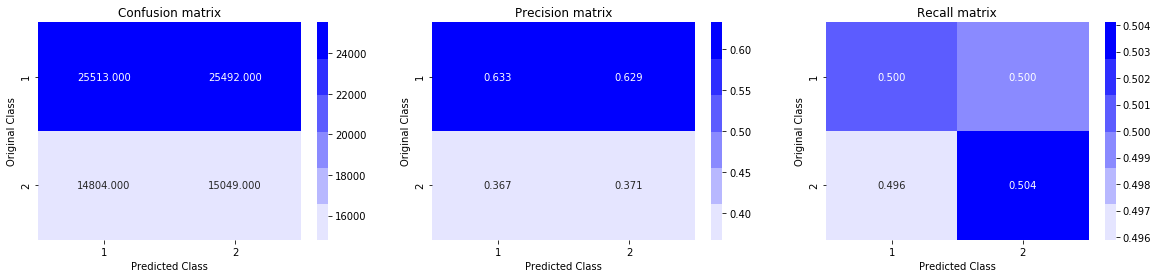

In [55]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

print(f'log_loss on [ test_data using Random_Model ] ==> {log_loss(y_test, predicted_y, eps=1e-15)}')

predicted_y = np.argmax(predicted_y, axis=1)

plot_confusion_matrix(y_test,predicted_y)#using above function


<center><h3>SGDClassifier & Hyperparameter Tuning</h3></center>

In [56]:
#hyperparam
alpha = [10 ** x for x in range(-5,2)] 
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]

[SGD-Classifier Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [61]:
alpha = [10 ** x for x in range(-5,2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=108)
    clf.fit(X_train,y_train)
    
    sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
    sig_clf.fit(X_train,y_train)
    
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y,labels=clf.classes_,eps=1e-15))
    print(f'For values of alpha = {i}, log loss is: {log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15)}')

For values of alpha = 1e-05, log loss is: 0.4518226263478587
For values of alpha = 0.0001, log loss is: 0.45451812253622154
For values of alpha = 0.001, log loss is: 0.45102033471070324
For values of alpha = 0.01, log loss is: 0.43661784628300165
For values of alpha = 0.1, log loss is: 0.45141877660864926
For values of alpha = 1, log loss is: 0.4728840456072604
For values of alpha = 10, log loss is: 0.5257608247242521


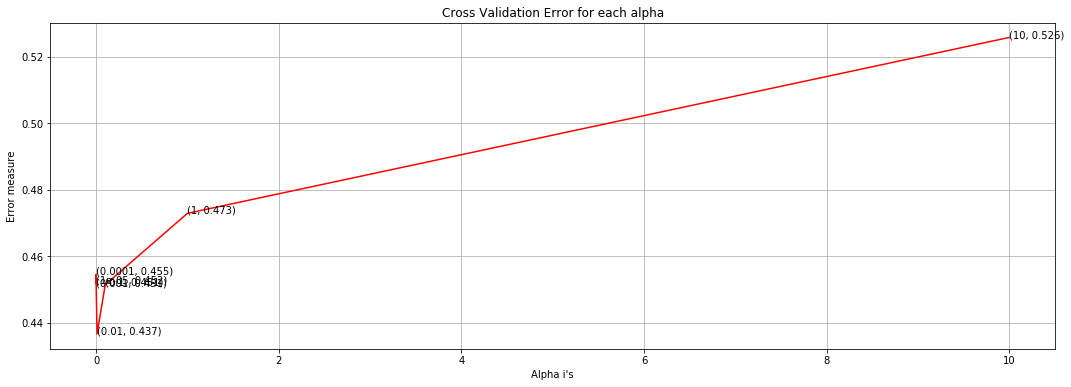

In [87]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,6))
ax.plot(alpha,log_error_array,c='r')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))

#ploting grid in backend
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

In [63]:
best_alpha = np.argmin(log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=108)
clf.fit(X_train,y_train)

sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(X_train, y_train)


CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, loss='log',
                                                    random_state=108))

For values of best alpha = 0.01, train log loss is: 0.4342107739025386
For values of best alpha = 0.01, test log loss is: 0.43661784628300165
Total number of data points : 80858


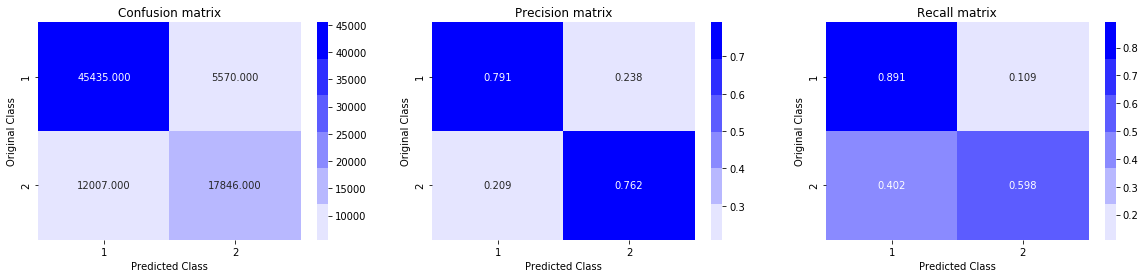

In [64]:
predict_y = sig_clf.predict_proba(X_train)
print(f'For values of best alpha = {alpha[best_alpha]}, train log loss is: {log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)}')

predict_y = sig_clf.predict_proba(X_test)
print(f'For values of best alpha = {alpha[best_alpha]}, test log loss is: {log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)}')

predicted_y =np.argmax(predict_y,axis=1)
print(f'Total number of data points : {len(predicted_y)}')

plot_confusion_matrix(y_test, predicted_y)




<center><h3>XGBoost & Hyperparameter Tuning</h3></center>

In [65]:
import xgboost as xgb

In [66]:
#global 
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

In [67]:
X_train.columns.tolist()
type(X_train)

pandas.core.frame.DataFrame

In [68]:
X_test.columns.tolist()
type(X_test)

pandas.core.frame.DataFrame

In [69]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

In [70]:
watchlist = [(d_train, 'train'), (d_test, 'valid')]

[0]	train-logloss:0.68461	valid-logloss:0.68474
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61512	valid-logloss:0.61529
[20]	train-logloss:0.56448	valid-logloss:0.56484
[30]	train-logloss:0.52630	valid-logloss:0.52678
[40]	train-logloss:0.49702	valid-logloss:0.49746
[50]	train-logloss:0.47420	valid-logloss:0.47459
[60]	train-logloss:0.45585	valid-logloss:0.45632
[70]	train-logloss:0.44135	valid-logloss:0.44186
[80]	train-logloss:0.42944	valid-logloss:0.42996
[90]	train-logloss:0.41994	valid-logloss:0.42047
[100]	train-logloss:0.41209	valid-logloss:0.41265
[110]	train-logloss:0.40543	valid-logloss:0.40599
[120]	train-logloss:0.39988	valid-logloss:0.40039
[130]	train-logloss:0.39501	valid-logloss:0.39555
[140]	train-logloss:0.39109	valid-logloss:0.39163
[150]	train-logloss:0.38751	valid-logloss:0.38809
[160]	train-logloss:0.38459	valid-logloss:0.38516
[170]	trai

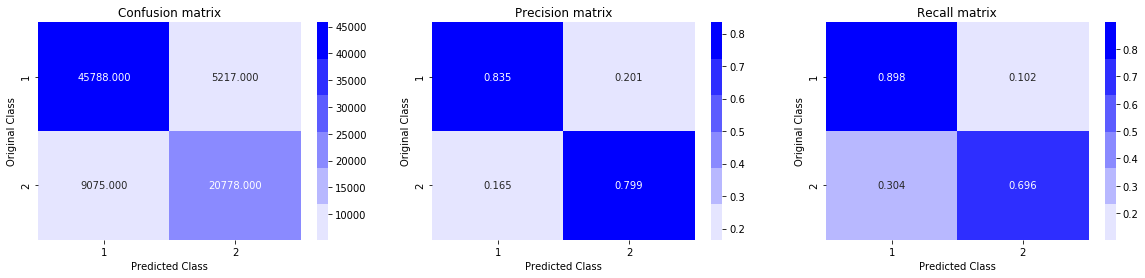

In [71]:
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)

print(f'test log loss is: {log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)}')

predicted_y = np.array(predict_y > 0.5,dtype=int)
print(f'total number of data points : {len(predicted_y)}')

plot_confusion_matrix(y_test, predicted_y)

<center><h3>Saving Model</h3></center>

In [72]:
import pickle

In [73]:
filename = 'models/xgboost_96.sav'
pickle.dump(bst, open(filename,'wb')) #write binary mode


In [74]:
#loading model from disk
loaded_model = pickle.load(open(filename,'rb')) #read binary mode
print(loaded_model)